In [ ]:
import autorootcwd
import os
from utils import get_chord_annotation, get_cqt, get_annotation_metadata, chord_to_id, chord_ann_to_tensor

import librosa

In [50]:
# Reload all modules automatically
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [111]:
# Load the dataset
filenames = [filename for filename in os.listdir('./data/processed/audio')]

# Filter out non-mp3 files and remove the extension using split
filenames = [filename.split('.')[0] for filename in filenames if filename.endswith('.mp3')]

In [ ]:
from tqdm import tqdm

duration_diffs = []
for filename in tqdm(filenames):
    lib = librosa.get_duration(filename=f'./data/processed/audio/{filename}.mp3')
    duration_chords = get_annotation_metadata(filename).duration
    diff = lib - duration_chords
    duration_diffs.append(diff)

  0%|          | 0/1213 [00:00<?, ?it/s]/var/folders/wv/rkgyh65d1jx0nzbn07gn8f380000gn/T/ipykernel_1124/382164725.py:5: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  lib = librosa.get_duration(filename=f'./data/processed/audio/{filename}.mp3')
100%|██████████| 1213/1213 [00:17<00:00, 67.55it/s]


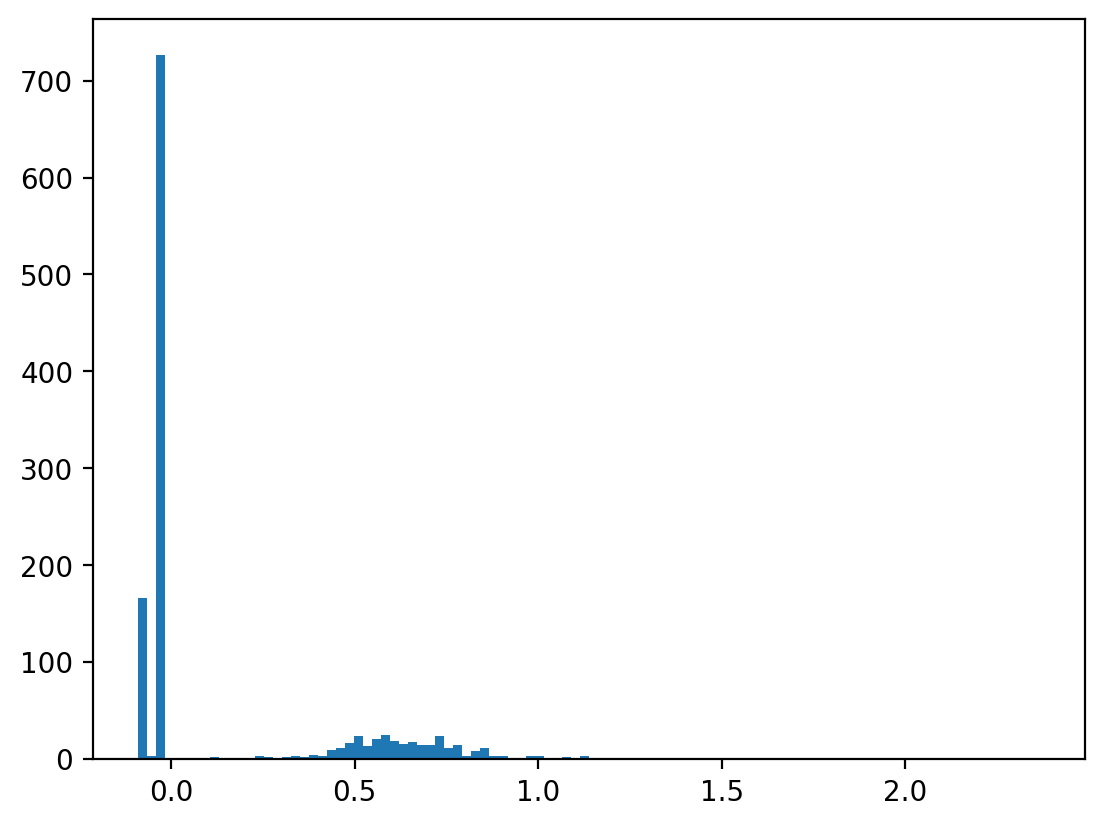

In [124]:
# Hist of differences
import matplotlib.pyplot as plt
plt.hist(duration_diffs, bins=100)
plt.title('Histogram of audio - chord annotation duration differences')
plt.show()

In [ ]:
from tqdm import tqdm

duration_diffs_chords = []
for filename in tqdm(filenames):
    duration_chords = get_annotation_metadata(filename).duration
    chord_ann = get_chord_annotation(filename)
    chord_duration = chord_ann[-1].time + chord_ann[-1].duration
    diff = chord_duration - duration_chords
    duration_diffs_chords.append(diff)

100%|██████████| 1213/1213 [00:15<00:00, 78.66it/s]


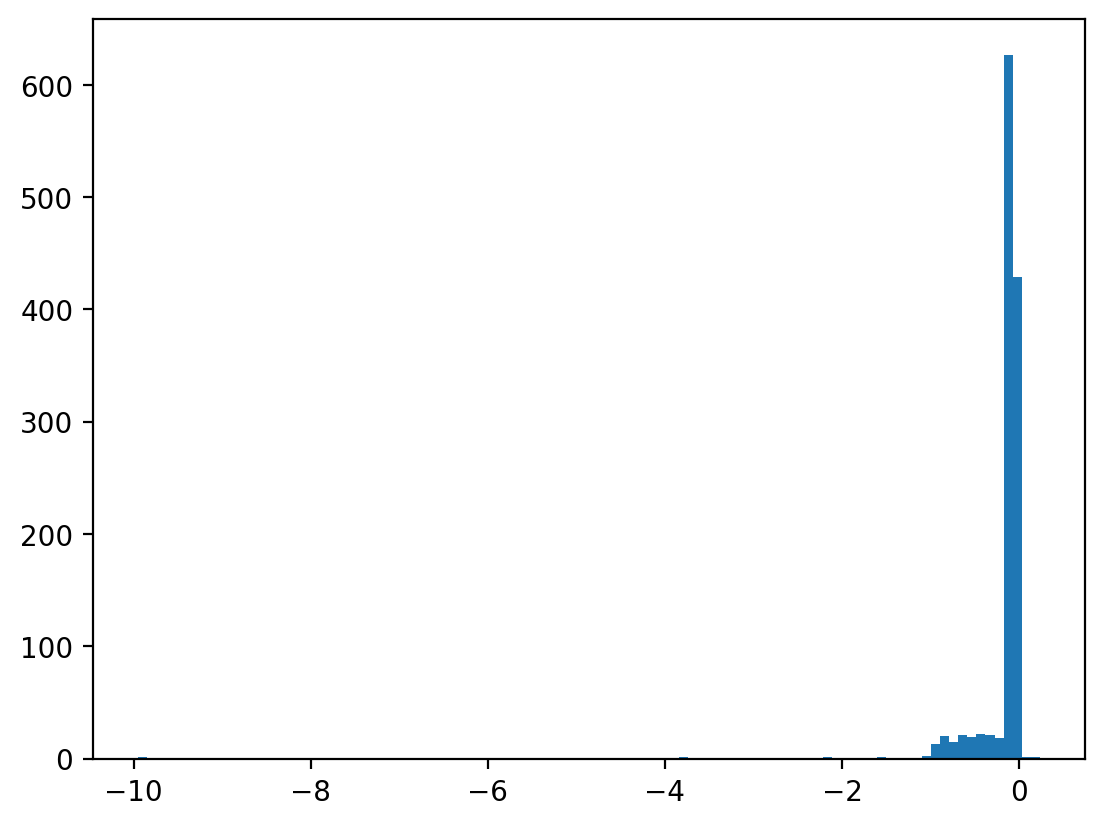

In [126]:
# Hist of differences
import matplotlib.pyplot as plt
plt.hist(duration_diffs_chords, bins=100)
plt.show()

In [62]:
print(train_dataset[idx][1])

SortedKeyList([Observation(time=0.0, duration=0.515193, value='N', confidence=1.0), Observation(time=0.515193, duration=1.38233, value='N', confidence=1.0), Observation(time=1.897523, duration=0.46077700000000005, value='A:5', confidence=1.0), Observation(time=2.358299, duration=1.38233, value='B:maj', confidence=1.0), Observation(time=3.740629, duration=0.46077700000000005, value='E:5', confidence=1.0), Observation(time=4.201406, duration=1.843107, value='B:maj', confidence=1.0), Observation(time=6.044512, duration=1.843107, value='E:maj', confidence=1.0), Observation(time=7.887619000000001, duration=1.38233, value='B:maj', confidence=1.0), Observation(time=9.269949, duration=0.46077700000000005, value='A:5', confidence=1.0), Observation(time=9.730726, duration=1.5069810000000001, value='B:maj', confidence=1.0), Observation(time=11.237707, duration=0.502326999, value='E:5', confidence=1.0), Observation(time=11.740034000000001, duration=2.0093080000000003, value='B:maj', confidence=1.0

In [93]:
dataset.get_filename(idx), dataset.get_metadata(idx)

("billyjoel_don'taskmewhy",
 <FileMetadata(artist='Billy Joel',
               title="Don't Ask Me Why",
               release='The Essential Billy Joel',
               duration=179.14776,
               jams_version='0.2.1',
               identifiers=<Sandbox(...)>)>)